In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=pooria_b&password=119@266113Pooria&submit=Login' https://www.cityscapes-dataset.com/login/
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1

--2022-06-16 15:10:19--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2022-06-16 15:10:21--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.6’

index.html.6            [  <=>               ]  47.35K   211KB/s    in 0.2s    

2022-06-16 15:10:21 (211 KB/s) - ‘index.html.6’ saved [48483]

--2022-06-16 15:10:21--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.2

In [ ]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=pooria_b&password=119@266113Pooria&submit=Login' https://www.cityscapes-dataset.com/login/
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2022-06-16 15:10:41--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2022-06-16 15:10:42--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.7’

index.html.7            [  <=>               ]  47.35K   223KB/s    in 0.2s    

2022-06-16 15:10:42 (223 KB/s) - ‘index.html.7’ saved [48483]

--2022-06-16 15:10:42--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.2

In [ ]:
!unzip -xq "/content/gtFine_trainvaltest.zip"
!rm        "/content/gtFine_trainvaltest.zip"

In [ ]:
!unzip -xq "/content/leftImg8bit_trainvaltest.zip"
!rm        '/content/leftImg8bit_trainvaltest.zip'

replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import cv2
import os
from shutil import copy, move

from tqdm.notebook import tqdm

In [ ]:
color_path      = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_color.png'
instanceID_path = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_instanceIds.png'
labelID_path    = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_labelIds.png'
jason_path      = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_polygons.json'

In [ ]:
(cv2.imread(labelID_path, 0)).shape

(1024, 2048)

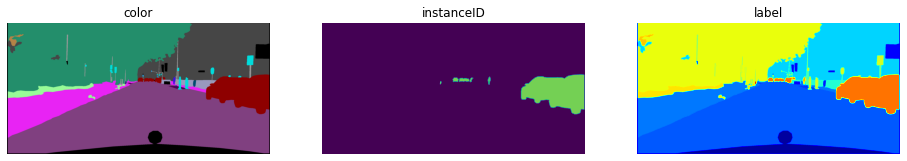

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,18))

ax[0].imshow(cv2.imread(color_path))
ax[0].axis('off')
ax[0].set_title('color')

ax[1].imshow(cv2.imread(instanceID_path, 0))
ax[1].axis('off')
ax[1].set_title('instanceID')

ax[2].imshow(cv2.imread(labelID_path, 0), cmap = 'jet')
ax[2].axis('off')
ax[2].set_title('label')

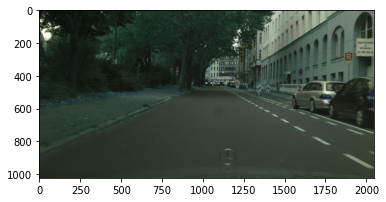

In [ ]:
left_img_path = '/content/leftImg8bit/train/aachen/aachen_000002_000019_leftImg8bit.png'
img = cv2.imread(left_img_path)
plt.imshow(img)

In [ ]:
mask_dataset = glob('/content/drive/MyDrive/Data/gtFine/train/*/*.png')
print('Y train len', len(mask_dataset))

Y train len 2975


In [ ]:
image_dataset = glob('/content/leftImg8bit/train/*/*.png')
print('X train len', len(image_dataset))

X train len 0


In [ ]:
train_img_names = glob('/content/leftImg8bit/train/*/*.png')
train_img_names.sort()

val_img_names = glob('/content/leftImg8bit/val/*/*.png')
val_img_names.sort()

test_img_names = glob('/content/leftImg8bit/test/*/*.png')
test_img_names.sort()

In [ ]:
print('total number of training image is   : ' , len(train_img_names))
print('total number of test image is       : ' , len(test_img_names))
print('total number of validation image is : ' , len(val_img_names))

total number of training image is   :  2975
total number of test image is       :  1525
total number of validation image is :  500


In [ ]:
# !rm -rf '/content/dataset_aug_format'

In [ ]:
train_images = '/content/dataset_aug_format/train_images/images'
train_masks  = '/content/dataset_aug_format/train_masks/masks'

val_images   = '/content/dataset_aug_format/val_images/images'
val_masks    = '/content/dataset_aug_format/val_masks/masks' 

os.makedirs(train_images, exist_ok = True)
os.makedirs(train_masks, exist_ok = True)

os.makedirs(val_images, exist_ok = True)
os.makedirs(val_masks, exist_ok = True)

In [ ]:
old_imgs_path_train = glob('/content/leftImg8bit/train/*/*.png')
old_imgs_path_train.sort()
for img_path in tqdm(old_imgs_path_train):
  copy(img_path, train_images)

old_imgs_path_val = glob('/content/leftImg8bit/val/*/*.png')
old_imgs_path_val.sort()
for img_path in tqdm(old_imgs_path_val):
  copy(img_path, val_images)

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
old_masks_path_train = glob('/content/drive/MyDrive/Data/gtFine/train/*/*.png')
old_masks_path_train.sort()
for img_path in tqdm(old_masks_path_train):
  copy(img_path, train_masks)

old_masks_path_val = glob('/content/drive/MyDrive/Data/gtFine/val/*/*.png')
old_masks_path_val.sort()
for img_path in tqdm(old_masks_path_val):
  copy(img_path, val_masks)

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
train_img_names = glob('/content/dataset_aug_format/train_images/*/*.png')
train_msk_names = glob('/content/dataset_aug_format/train_masks/*/*.png')

val_img_names = glob('/content/dataset_aug_format/val_images/*/*.png')
val_msk_names = glob('/content/dataset_aug_format/val_masks/*/*.png')

In [ ]:
print('total number of training image is : ' , len(train_img_names))
print('total number of training mask is  : ' , len(train_msk_names))

print('total number of val image is      : ' , len(val_img_names))
print('total number of val mask is       : ' , len(val_msk_names))

total number of training image is :  2975
total number of training mask is  :  2975
total number of val image is      :  500
total number of val mask is       :  500


In [ ]:
img_dir = glob('/content/dataset_aug_format/train_images/*/*.png')
img_dir.sort()
msk_dir = glob('/content/dataset_aug_format/train_masks/*/*.png')
msk_dir.sort()

In [ ]:
img_dir[:5]

['/content/dataset_aug_format/train_images/images/aachen_000000_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000001_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000002_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000003_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000004_000019_leftImg8bit.png']

In [ ]:
img_dir[0]

'/content/dataset_aug_format/train_images/images/aachen_000000_000019_leftImg8bit.png'

In [ ]:
msk_dir[0]

'/content/dataset_aug_format/train_masks/masks/aachen_000000_000019_gtFine_labelIds.png'

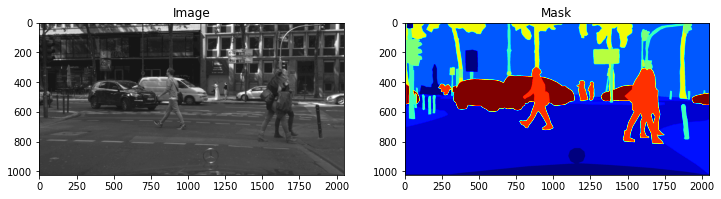

In [ ]:
import random

num_images = len(img_dir)

img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(img_dir[img_num], 0)
mask_for_plot =cv2.imread(msk_dir[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot, cmap='gray')
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='jet')
plt.title('Mask')
plt.show()

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
train_img_dir = '/content/dataset_aug_format/train_images/images/'
train_mask_dir= '/content/dataset_aug_format/train_masks/masks/'

img_list = os.listdir(train_img_dir)
img_list.sort()

mask_list = os.listdir(train_mask_dir)
mask_list.sort()

num_images = len(os.listdir(train_img_dir))
print('total number os training images are :' , num_images)

total number os training images are : 2975


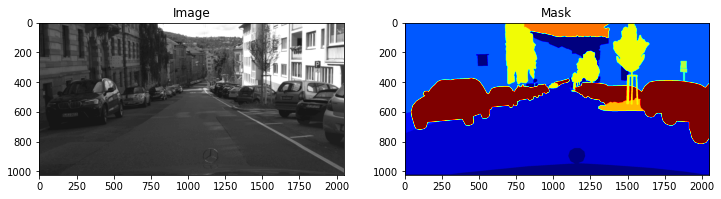

In [ ]:
import random
img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir  + img_list[img_num], 0)
mask_for_plot =cv2.imread(train_mask_dir + mask_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot, cmap='gray')
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='jet')
plt.title('Mask')
plt.show()

In [ ]:
print("Unique values in the mask are: ", np.unique(mask_for_plot))

Unique values in the mask are:  [ 0  1  2  3  6  8  9 10 11 12 14]


In [ ]:
#Sample code to encode this single image. We will include this as part of our data gen. 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
h, w = mask_for_plot.shape  
mask_for_plot_reshaped = mask_for_plot.reshape(-1,1)
mask_for_plot_reshaped_encoded = labelencoder.fit_transform(mask_for_plot_reshaped)
mask_for_plot_encoded = mask_for_plot_reshaped_encoded.reshape(h, w)
print("Unique values in the mask after endcoding are: ", np.unique(mask_for_plot_encoded))

Unique values in the mask after endcoding are:  [ 0  1  2  3  4  5  6  7  8  9 10]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

seed=24
batch_size= 32
num_class = 35

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc. 
def preprocess_data(img, mask, num_class):
    #Scale images
    img = img / 255. #This can be done in ImageDataGenerator but showing it outside as an example
    #Convert mask to one-hot
    labelencoder = LabelEncoder()
    n, h, w, c = mask.shape  
    mask = mask.reshape(-1,1)
    mask = labelencoder.fit_transform(mask)
    mask = mask.reshape(n, h, w, c)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

#Define the generator.
#We are not doing any rotation or zoom to make sure mask values are not interpolated.
#It is important to keep pixel values in mask as 0, 1, 2, 3, .....
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen  = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        color_mode = 'grayscale',
        target_size=(128,128),
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        target_size=(128,128),
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)


In [ ]:
train_img_path = "/content/dataset_aug_format/train_images/"
train_mask_path = "/content/dataset_aug_format/train_masks/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=num_class)

val_img_path = "/content/dataset_aug_format/val_images/"
val_mask_path = "/content/dataset_aug_format/val_masks"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class = num_class)

In [ ]:
x, y = train_img_gen.__next__()

Found 2975 images belonging to 1 classes.
Found 2975 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(x.shape)
print(y.shape)
print("max value in image dataset is: ", x.max())

(32, 128, 128, 1)
(32, 128, 128, 35)
max value in image dataset is:  1.0


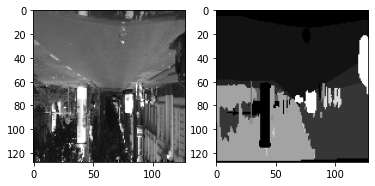

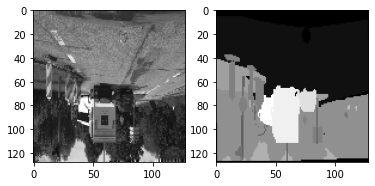

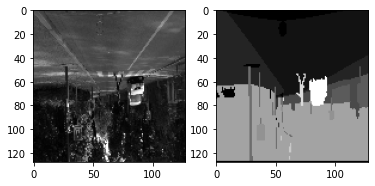

In [ ]:
for i in range(0,3):
    image = x[i,:,:,0]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

In [ ]:
num_train_imgs = len(os.listdir('/content/dataset_aug_format/train_images/images'))
num_val_images = len(os.listdir('/content/dataset_aug_format/val_images/images'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
n_classes= num_class

In [ ]:
model = danet_resnet101(height=IMG_HEIGHT, width=IMG_WIDTH, channel = IMG_CHANNELS, classes=num_class)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_500 (Conv2D)            (None, 64, 64, 64)   3136        ['input_5[0][0]']                
                                                                                                  
 batch_normalization_480 (Batch  (None, 64, 64, 64)  256         ['conv2d_500[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [ ]:
history=model.fit(train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=20,
          verbose=1,
          validation_data=val_img_gen,
          validation_steps=val_steps_per_epoch)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92/92 [==============================] - ETA: 0s - loss: 2.3789 - accuracy: 0.5714Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.
92/92 [==============================] - 488s 5s/step - loss: 2.3789 - accuracy: 0.5714 - val_loss: 356.5930 - val_accuracy: 0.0235
Epoch 2/20
92/92 [==============================] - 479s 5s/step - loss: 1.8992 - accuracy: 0.6888 - val_loss: 3.2431 - val_accuracy: 0.3684
Epoch 3/20
92/92 [==============================] - 480s 5s/step - loss: 1.6543 - accuracy: 0.7232 - val_loss: 2.3048 - val_accuracy: 0.5515
Epoch 4/20
92/92 [==============================] - 462s 5s/step - loss: 1.4774 - accuracy: 0.7411 - val_loss: 2.0811 - val_accuracy: 0.6020
Epoch 5/20
92/92 [==============================] - 476s 5s/step - loss: 1.3700 - accuracy: 0.7448 - val_loss: 1.7300 - val_accuracy: 0.6451
Epoch 6/20
92/92 [==============================] - 478s 5s/step - loss: 1.2245 - accuracy: 0.7649 - val_loss: 1.5745 - val_accuracy: 0.6738

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from IPython.core.pylabtools import figsize
import random

num_images = 10
test_img_numbers = np.random.randint(0, len(X_test)-1, num_images)
test_images      = [ X_test[image_number] for image_number in test_img_numbers]
ground_truths    = [ y_test[image_number] for image_number in test_img_numbers]

test_img_norms   = [test_img[:,:,0][:,:,None] for test_img in test_images]

test_img_inputs  = [np.expand_dims(test_img_norm, 0)     for test_img_norm   in test_img_norms]
predictions      = [(model.predict(test_img_input))      for test_img_input  in test_img_inputs]
predicted_imgs   = [np.argmax(prediction, axis=3)[0,:,:] for prediction      in predictions ]

nrows = num_images
ncols = 3

fig, ax = plt.subplots(nrows = nrows , ncols = ncols ,figsize=(14 ,60))

for i in range(nrows):
  ax[i][0].imshow(test_images[i][:,:,0], cmap= 'gray')
  ax[i][0].axis('off')
  ax[i][0].set_title('Testing Image')

  ax[i][1].imshow(ground_truths[i], cmap='jet')
  ax[i][1].axis('off')
  ax[i][1].set_title('Testing Image')

  ax[i][2].imshow(predicted_imgs[i], cmap='jet')
  ax[i][2].axis('off')
  ax[i][2].set_title('Prediction on test image')